## Importações 


In [98]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataframe
df = pd.read_csv('C:\\Users\\souza\\Downloads\\projeto - Risco de crédito desenrola\\data\\dados_desenrola (2).csv', delimiter=';')
df

,DATA_BASE,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
0,202309,2,AC,49906,BB,142,"1421991,10"
1,202309,2,AC,10045,BRADESCO,17,"94097,52"
2,202309,2,AC,49944,BTG PACTUAL,7,"37788,79"
3,202309,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
4,202309,2,AC,51884,INTER,4,"12306,86"
...,...,...,...,...,...,...,...
7843,202502,3,RJ,80185,SANTANDER - PRUDENCIAL,12,"403555,07"
7844,202502,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,"17259,94"
7845,202502,3,RS,80185,SANTANDER - PRUDENCIAL,7,"168618,00"
7846,202502,3,SC,80185,SANTANDER - PRUDENCIAL,1,"23834,66"


## Analise descritiva e tratamento de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DATA_BASE                     7848 non-null   int64 
 1   TIPO_DESENROLA                7848 non-null   int64 
 2   UNIDADE_FEDERACAO             7848 non-null   object
 3   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64 
 4   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object
 5   NUMERO_OPERACOES              7848 non-null   int64 
 6   VOLUME_OPERACOES              7848 non-null   object
dtypes: int64(4), object(3)
memory usage: 429.3+ KB


In [4]:
#verificar media, mediana, desvio padrao e etc 
df.describe()

,DATA_BASE,TIPO_DESENROLA,COD_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES
count,7848.000000,7848.000000,7.848000e+03,7848.000000
mean,202385.877676,1.497706,1.323293e+06,318.405581
std,52.846366,0.679579,8.231551e+06,1361.666387
min,202309.000000,1.000000,1.004500e+04,1.000000
25%,202312.000000,1.000000,3.029000e+04,3.000000
50%,202404.000000,1.000000,4.994400e+04,19.000000
75%,202408.000000,2.000000,5.188400e+04,147.000000
max,202502.000000,3.000000,8.682983e+07,46456.000000


In [5]:
#verificar se há dados nulos 
df.isnull().sum()

DATA_BASE                       0
TIPO_DESENROLA                  0
UNIDADE_FEDERACAO               0
COD_CONGLOMERADO_FINANCEIRO     0
NOME_CONGLOMERADO_FINANCEIRO    0
NUMERO_OPERACOES                0
VOLUME_OPERACOES                0
dtype: int64

In [6]:
#verificar se há dados duplicados 
df.duplicated().sum()

0

In [7]:
#criando uma cópia do df 
df2 = df.copy()

In [8]:
#convertendo coluna DATA_BASE para data 
df2['DATA_BASE'] = pd.to_datetime(df2['DATA_BASE'], format='%Y%m', errors='coerce')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATA_BASE                     7848 non-null   datetime64[ns]
 1   TIPO_DESENROLA                7848 non-null   int64         
 2   UNIDADE_FEDERACAO             7848 non-null   object        
 3   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64         
 4   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object        
 5   NUMERO_OPERACOES              7848 non-null   int64         
 6   VOLUME_OPERACOES              7848 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 429.3+ KB


In [10]:
#setando data como index 
df2 = df2.set_index('DATA_BASE')
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,"1421991,10"
2023-09-01,2,AC,10045,BRADESCO,17,"94097,52"
2023-09-01,2,AC,49944,BTG PACTUAL,7,"37788,79"
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
2023-09-01,2,AC,51884,INTER,4,"12306,86"
...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,"403555,07"
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,"17259,94"
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,"168618,00"


In [11]:
#transformando coluna VOLUME_OPERACOES em float 
df2['VOLUME_OPERACOES'] = df2['VOLUME_OPERACOES'].str.replace(',', '.').str.strip()
df2['VOLUME_OPERACOES'] = pd.to_numeric(df2['VOLUME_OPERACOES'], errors='coerce')

In [12]:
#df2['COD_CONGLOMERADO_FINANCEIRO'] = df2['COD_CONGLOMERADO_FINANCEIRO'].astype('float')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7848 entries, 2023-09-01 to 2025-02-01
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TIPO_DESENROLA                7848 non-null   int64  
 1   UNIDADE_FEDERACAO             7848 non-null   object 
 2   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64  
 3   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object 
 4   NUMERO_OPERACOES              7848 non-null   int64  
 5   VOLUME_OPERACOES              7848 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 429.2+ KB


In [14]:
df2.head(5)

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10
2023-09-01,2,AC,10045,BRADESCO,17,94097.52
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66
2023-09-01,2,AC,51884,INTER,4,12306.86


In [15]:
some_columns = ['NUMERO_OPERACOES', 'VOLUME_OPERACOES']
for some in some_columns:
    mean = df2[some].mean()
    std = df2[some].std()
    median = df2[some].median()
    
    results = {'nome_coluna':some,
        'média':mean,
            'desvio_padrao':std,
            'median':median
        }
    print(results)

{'nome_coluna': 'NUMERO_OPERACOES', 'média': 318.40558103975536, 'desvio_padrao': 1361.6663869355068, 'median': 19.0}
{'nome_coluna': 'VOLUME_OPERACOES', 'média': 825362.3613302752, 'desvio_padrao': 5118237.34420361, 'median': 40955.03999999999}


A coluna VOLUME_OPERACOES possui um desvio padrao altissimo e sua média tambem é bem alta. Provavelmente estamos trabalhando com outliers

## Analise Univariada

In [16]:
#separaçao de tipos de colunas 
num_col = df2.select_dtypes(exclude='object')
cat_col = df2.select_dtypes(exclude='number').columns

In [17]:
cat_col

Index(['UNIDADE_FEDERACAO', 'NOME_CONGLOMERADO_FINANCEIRO'], dtype='object')

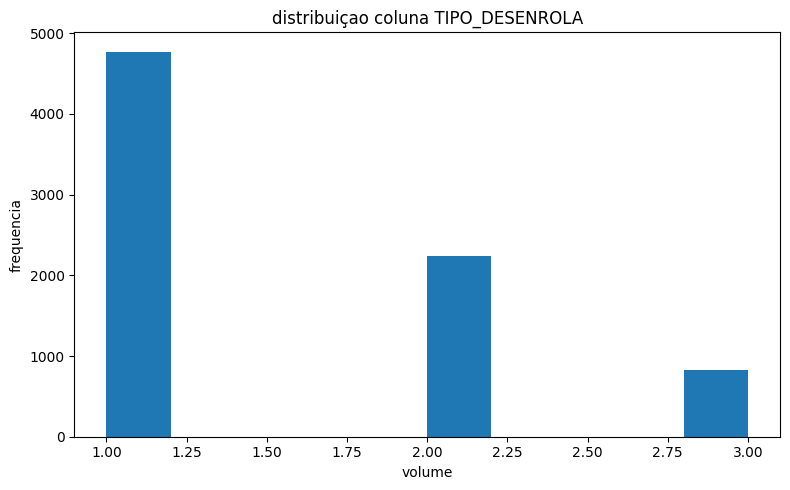

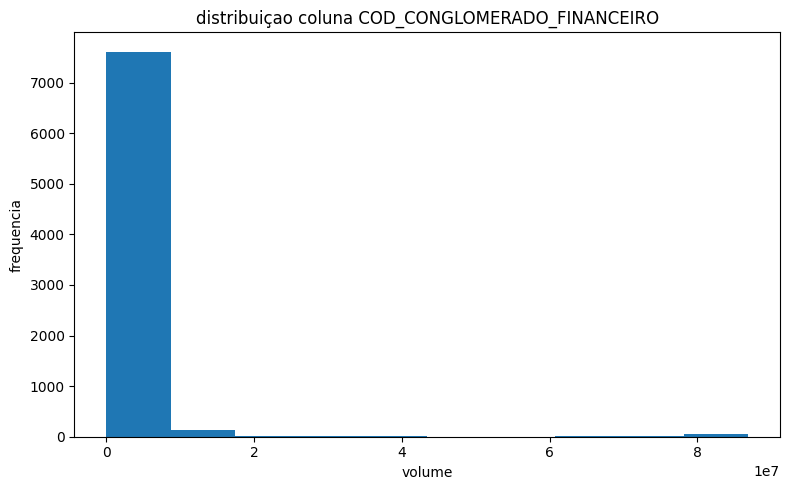

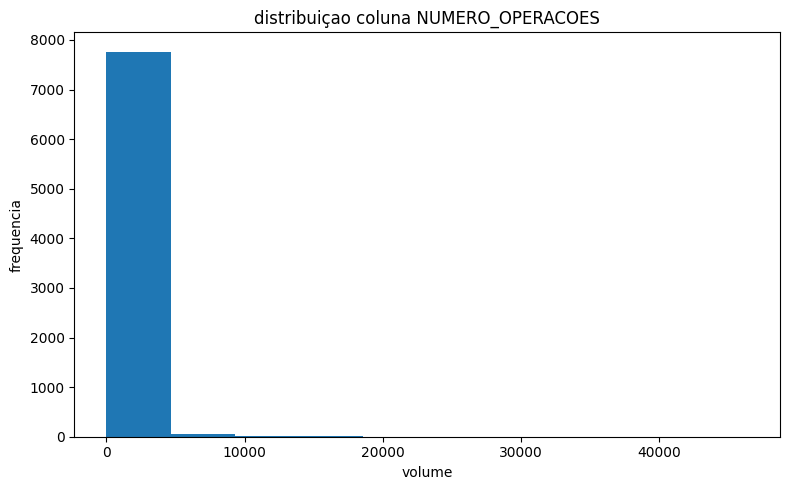

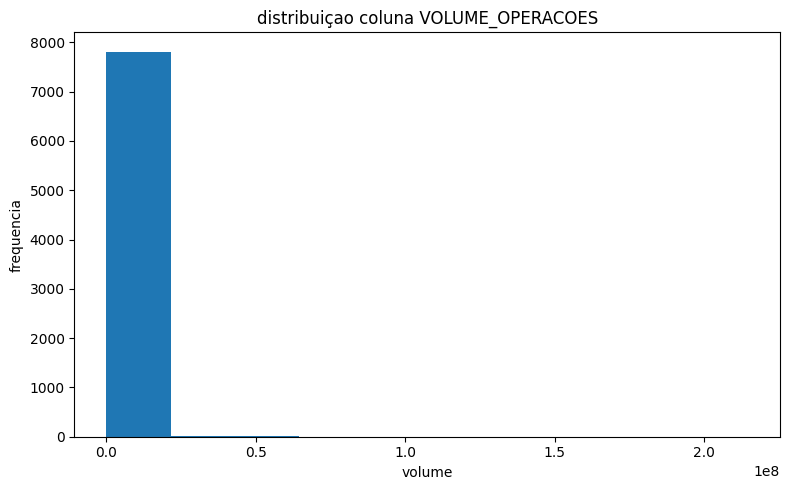

In [18]:
#distribuiçao variaveis numericas 
for i, num in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'distribuiçao coluna {num}')
    plt.hist(df2[num], bins=10)
    plt.xlabel('volume')
    plt.ylabel('frequencia')
    plt.tight_layout()
    plt.show()

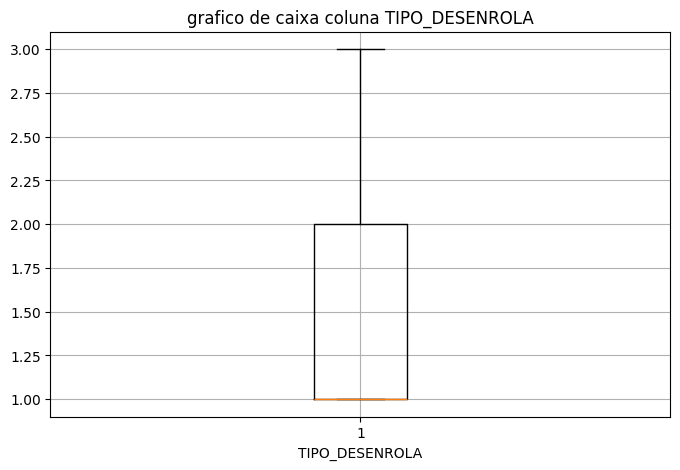

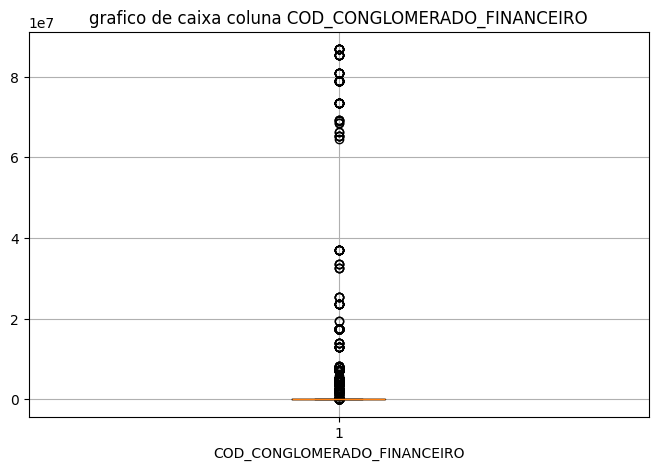

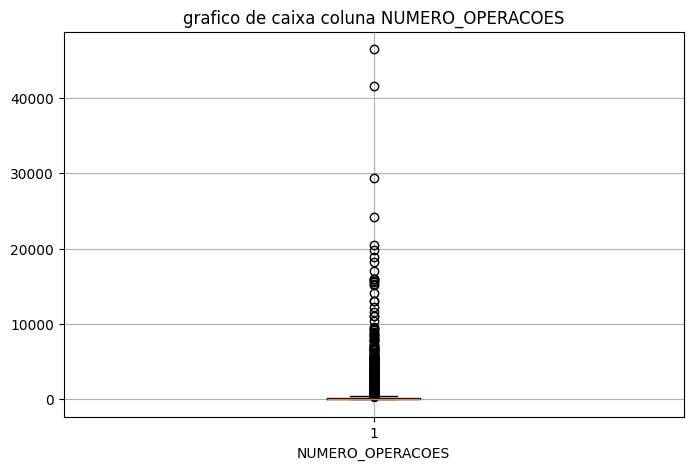

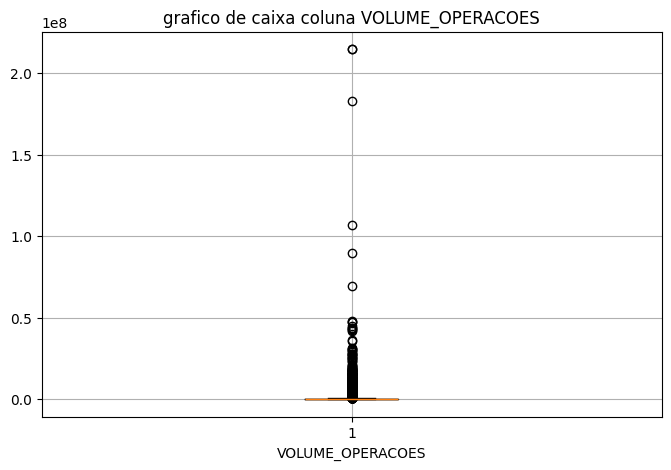

In [19]:
#grafico de caixa dados numericos 
for i, box in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'grafico de caixa coluna {box}')
    plt.boxplot(df2[box], vert=True)
    plt.xlabel(box)
    plt.grid()
    plt.show()

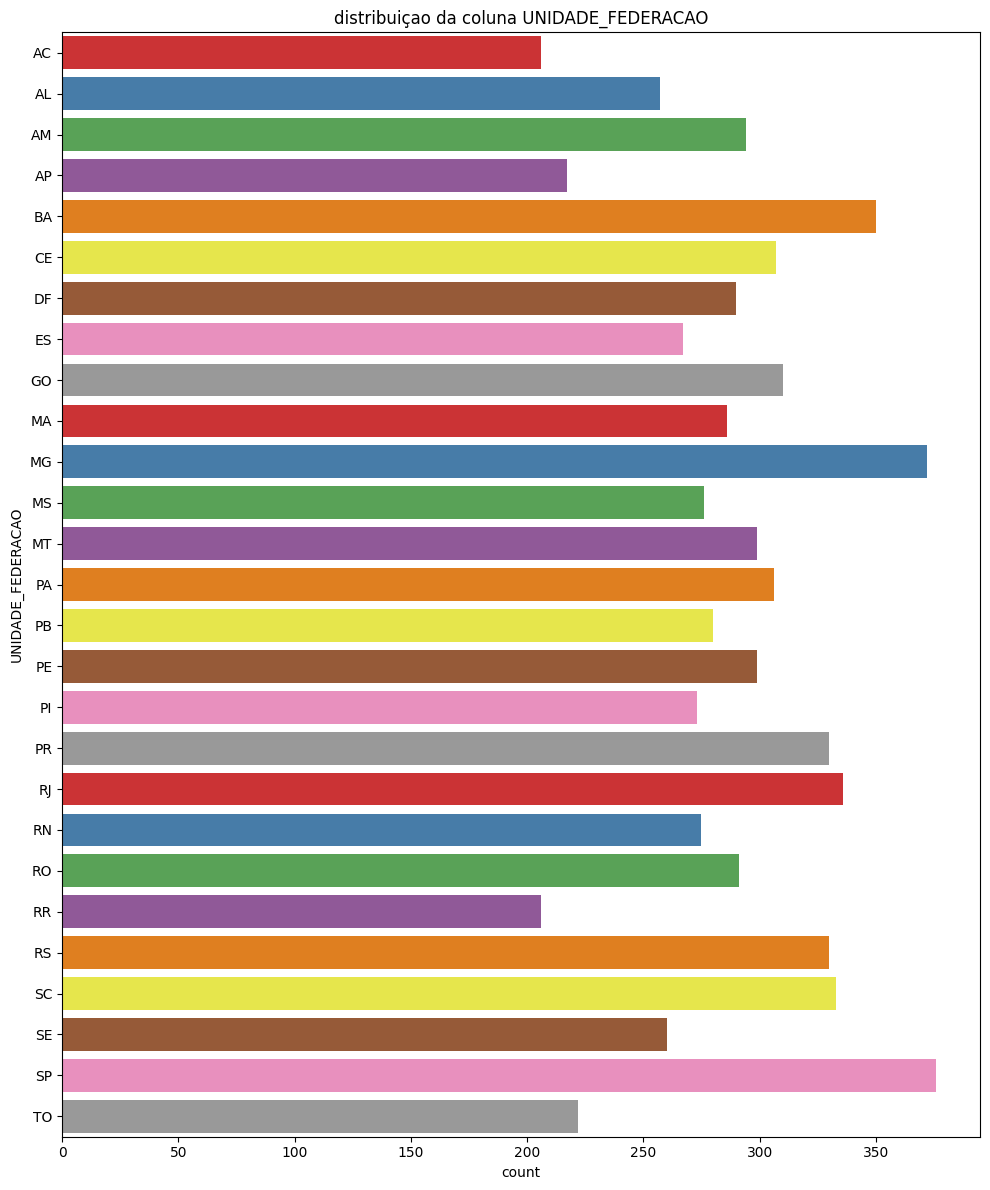

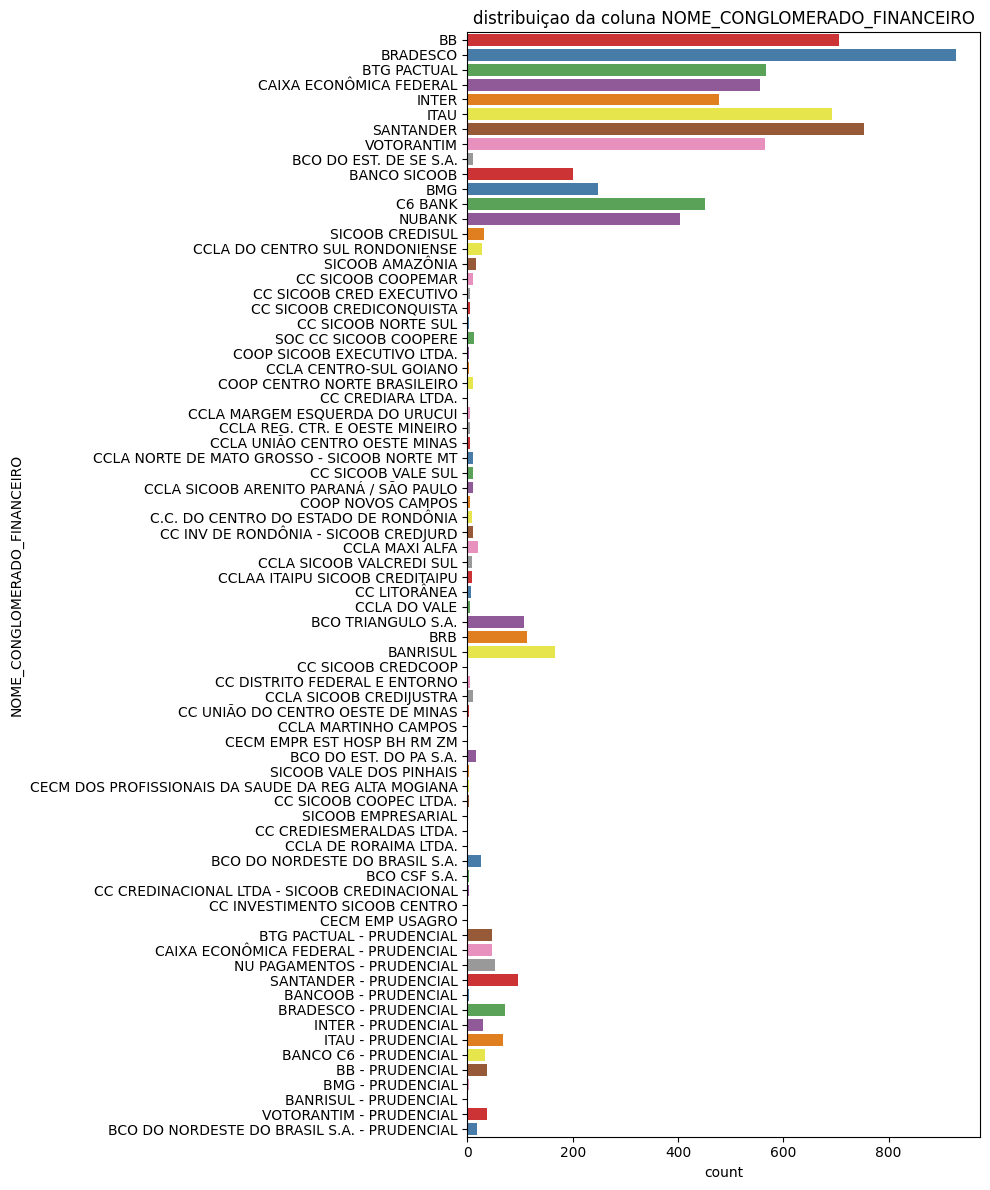

In [20]:
for i, cat in enumerate(cat_col):
    plt.figure(figsize=(10,12))
    plt.title(f'distribuiçao da coluna {cat}')
    sns.countplot(data=df2, y=cat, palette='Set1')
    plt.tight_layout()
    plt.show()

Perguntas de negocio 

In [21]:
cat_col

Index(['UNIDADE_FEDERACAO', 'NOME_CONGLOMERADO_FINANCEIRO'], dtype='object')

In [22]:
num_col.columns

Index(['TIPO_DESENROLA', 'COD_CONGLOMERADO_FINANCEIRO', 'NUMERO_OPERACOES',
       'VOLUME_OPERACOES'],
      dtype='object')

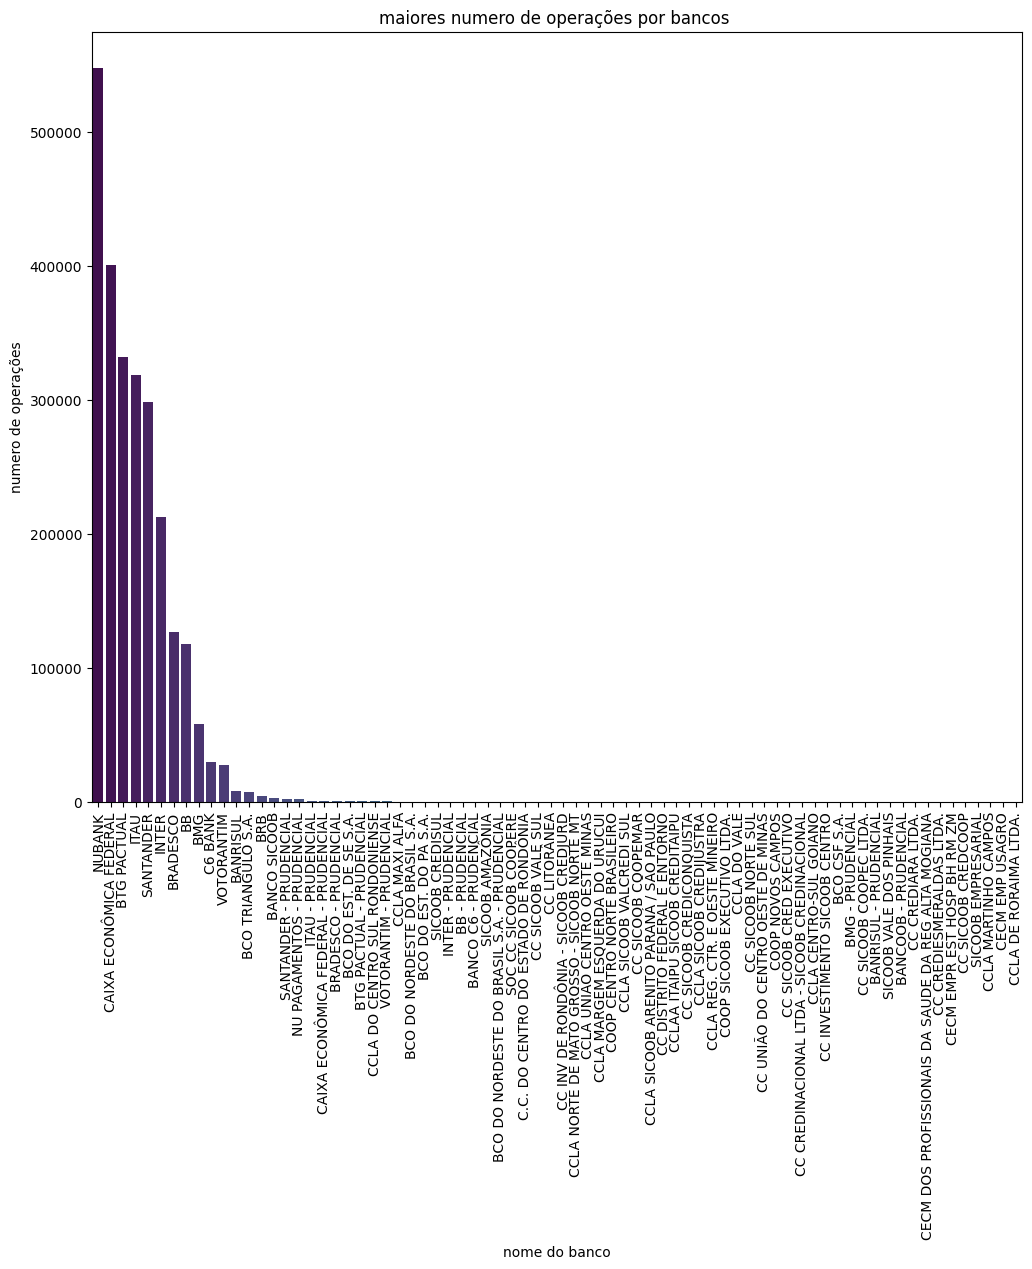

In [23]:
#bancos que mais realizaram operações 
group_bank = df2.groupby('NOME_CONGLOMERADO_FINANCEIRO')['NUMERO_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('maiores numero de operações por bancos ')
sns.barplot(group_bank, palette='viridis')
plt.xlabel('nome do banco')
plt.ylabel('numero de operações')
plt.xticks(rotation=(90))
plt.show()

In [24]:
#top 5 bancos que mais realizaram operações no desenrola brasil 
group_bank.head(5)

NOME_CONGLOMERADO_FINANCEIRO
NUBANK                     547423
CAIXA ECONÔMICA FEDERAL    400810
BTG PACTUAL                332136
ITAU                       318524
SANTANDER                  298376
Name: NUMERO_OPERACOES, dtype: int64

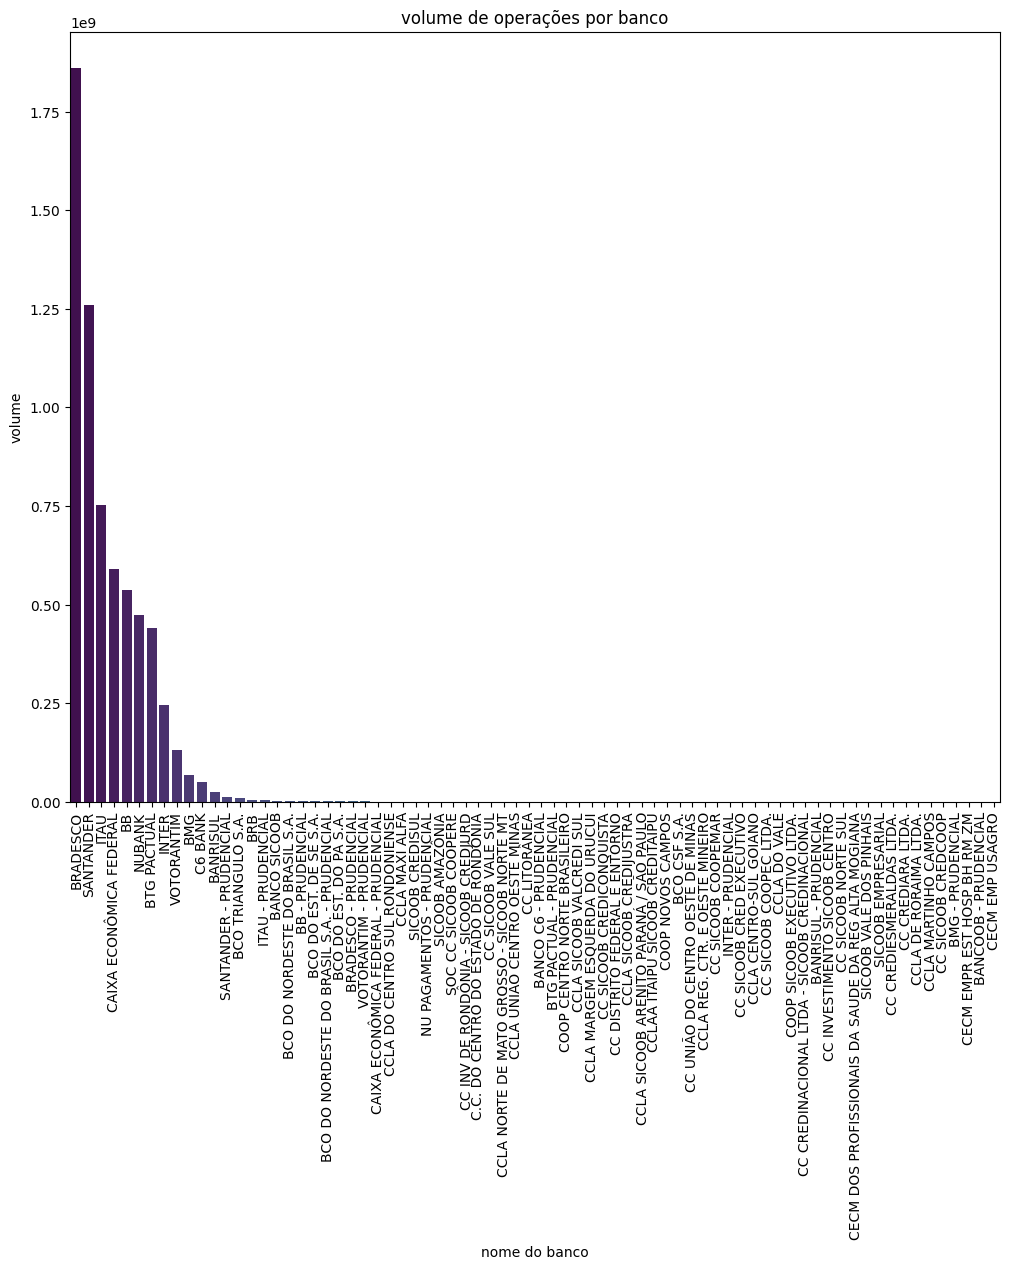

In [25]:
#bancos com maior volume de transações
bank_volumn = df2.groupby('NOME_CONGLOMERADO_FINANCEIRO')['VOLUME_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('volume de operações por banco')
sns.barplot(bank_volumn, palette='viridis')
plt.xlabel('nome do banco')
plt.ylabel('volume')
plt.xticks(rotation=90)
plt.show()

O Bradesco teve o maior volume de operações entre todos os bancos, de forma isolada.

Em seguida, temos o Santander, o Itaú e a Caixa Econômica Federal.

**Estados com maior volume de operações**


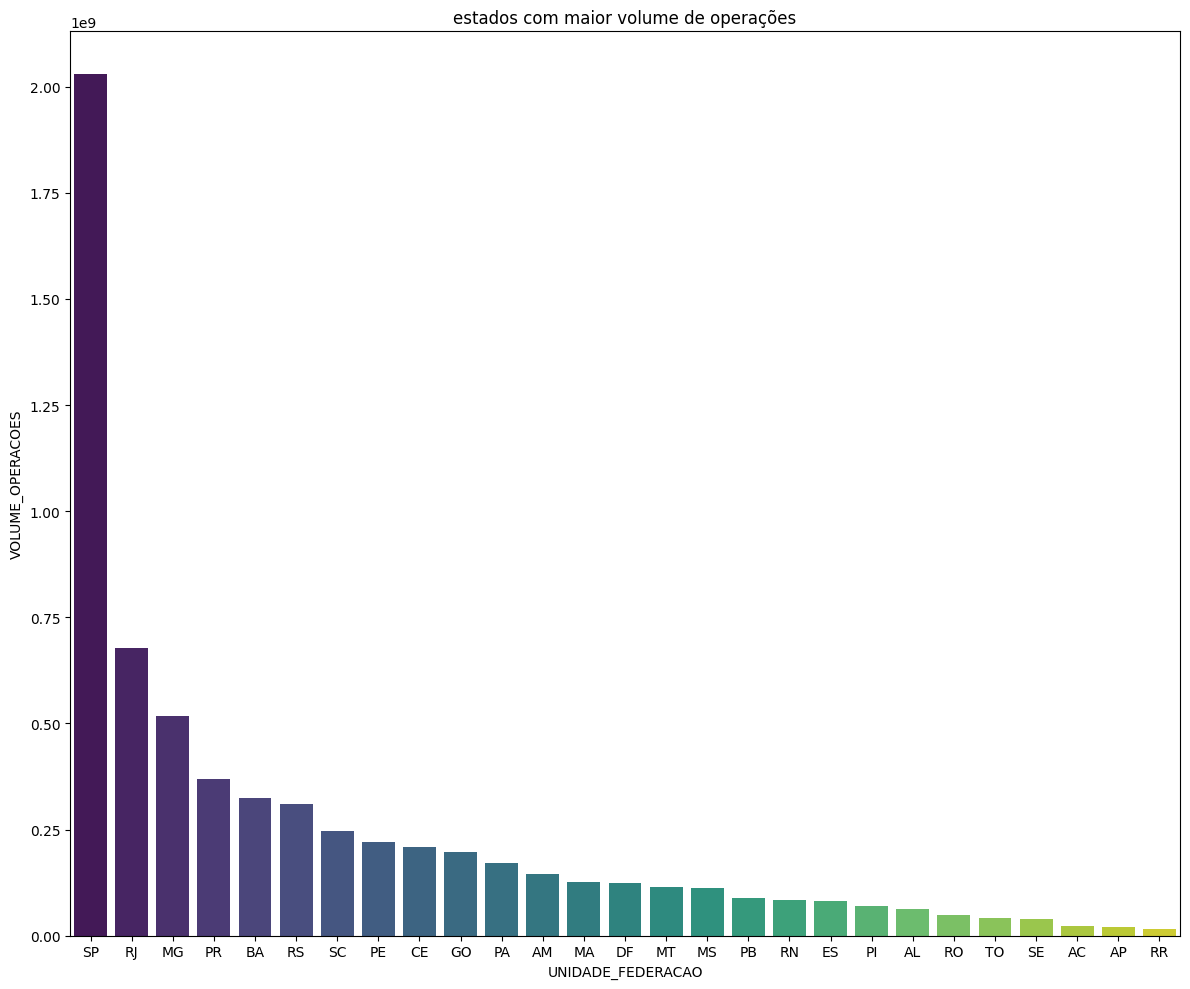

In [26]:
volumn_per_state = df2.groupby('UNIDADE_FEDERACAO')['VOLUME_OPERACOES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.title('estados com maior volume de operações')
sns.barplot(volumn_per_state, palette ='viridis')
plt.tight_layout()
plt.show()



São Paulo possui o maior volume de operações entre os estados

 **Nessa parte do projeto, vou buscar explorar os tipos de Desenrola e como eles estao distribuidos entre estados, volume, média e etc**

Tipo desenrola por banco 

In [27]:
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
DATA_BASE,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10
2023-09-01,2,AC,10045,BRADESCO,17,94097.52
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66
2023-09-01,2,AC,51884,INTER,4,12306.86
...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,403555.07
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,17259.94
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,168618.00


Qual é a distribuiçao dos bancos em relaçao ao numero de operaçoes e tipo de desenrola? 

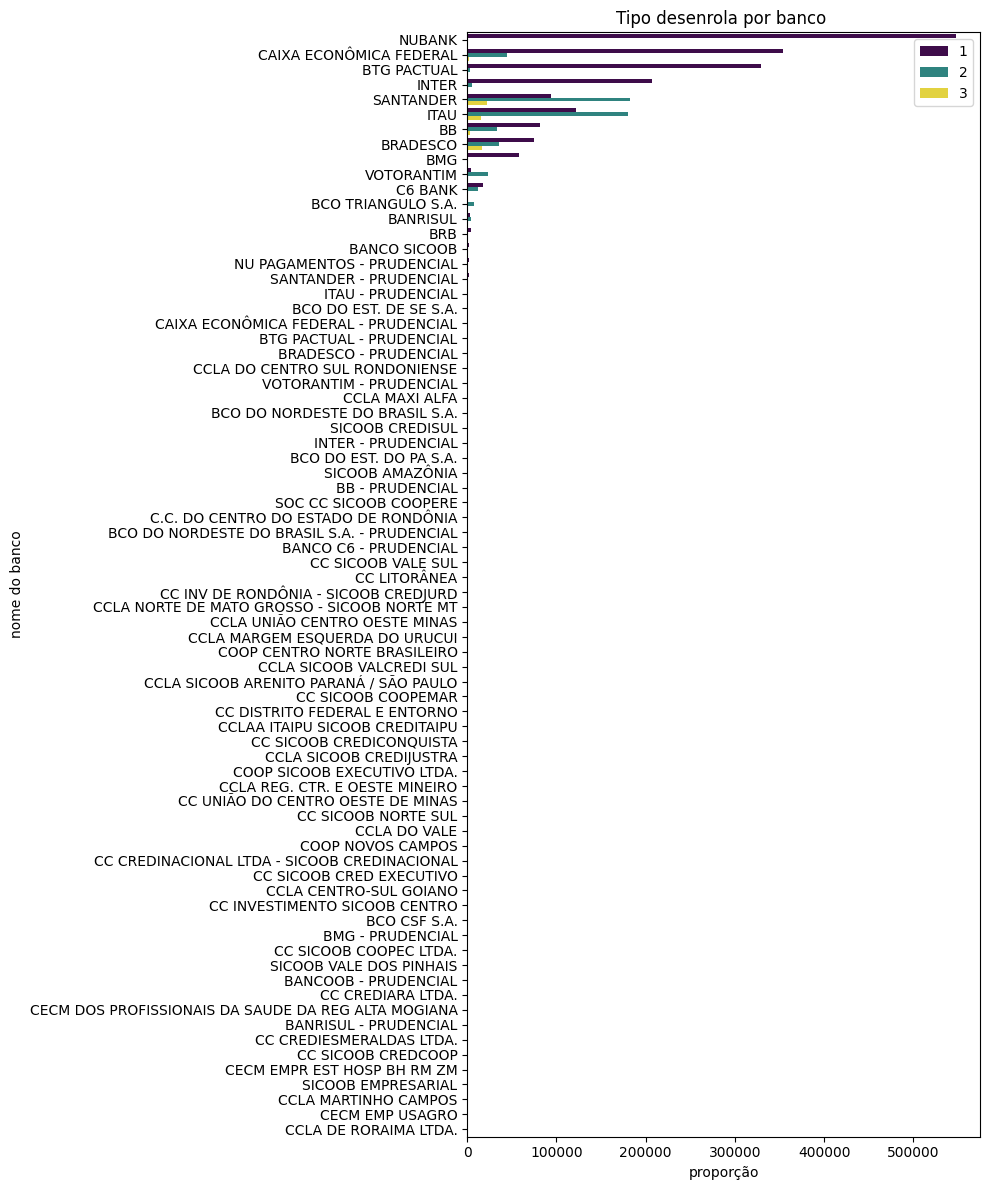

In [28]:
bank_per_operations = df2.groupby(['NOME_CONGLOMERADO_FINANCEIRO', 'TIPO_DESENROLA'])['NUMERO_OPERACOES'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,12))
plt.title('Tipo desenrola por banco ')
sns.barplot(data=bank_per_operations, y='NOME_CONGLOMERADO_FINANCEIRO', x='NUMERO_OPERACOES', hue='TIPO_DESENROLA', palette='viridis')
#sns.countplot(data=df2, y=df2['NOME_CONGLOMERADO_FINANCEIRO'],hue='TIPO_DESENROLA', palette='viridis')
plt.ylabel('nome do banco')
plt.xlabel('proporção')
plt.tight_layout()
plt.legend()
plt.show()

Um ponto a se destacar é que o nubank realizou somente transaçoes do tipo 1 

O tipo de desenrola tem impacto no volume de operaçoes?


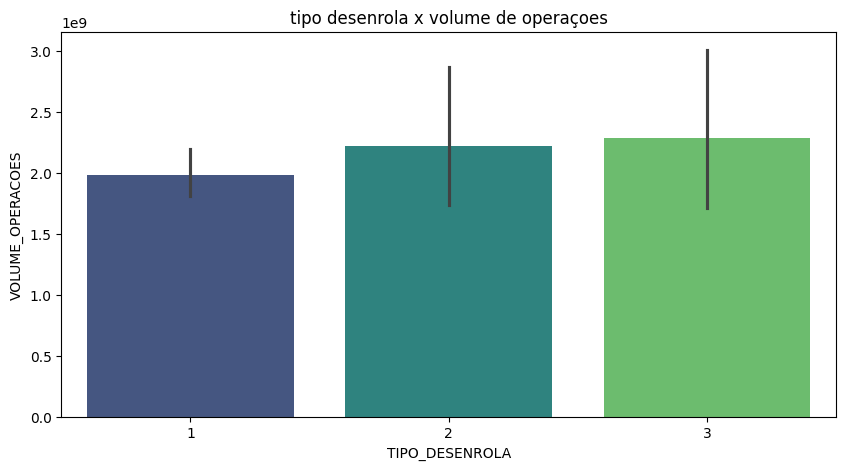

In [29]:
plt.figure(figsize=(10,5))
plt.title('tipo desenrola x volume de operaçoes')
sns.barplot(data=df2, x='TIPO_DESENROLA', y='VOLUME_OPERACOES', palette='viridis', estimator=sum)
plt.show()

O tipo de desenrola predominante é de tipo 3, porém, sem muito destaque em relaçao aos outos e com uma variancia maior. 

Vou buscar entender a média entre as operaçoes para levantar alguns argumentos

In [30]:
#criando nova coluna média entre operaçoes
df2['MEDIA_OPERAÇOES'] = df2['VOLUME_OPERACOES']/df2['NUMERO_OPERACOES']

Transaçao média por tipo desenrola

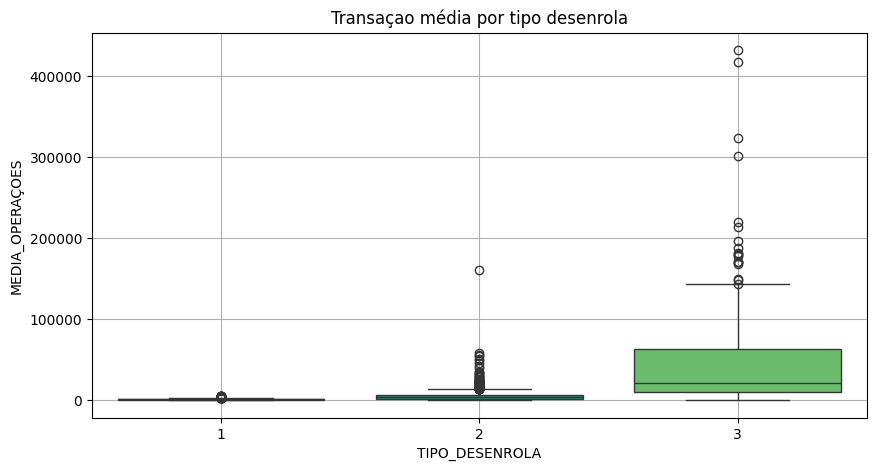

In [31]:
plt.figure(figsize=(10,5))
plt.title('Transaçao média por tipo desenrola')
sns.boxplot(data=df2, x='TIPO_DESENROLA', y='MEDIA_OPERAÇOES', palette='viridis')
plt.grid()
plt.show()

Média de operaçoes por estado e tipo desenrola

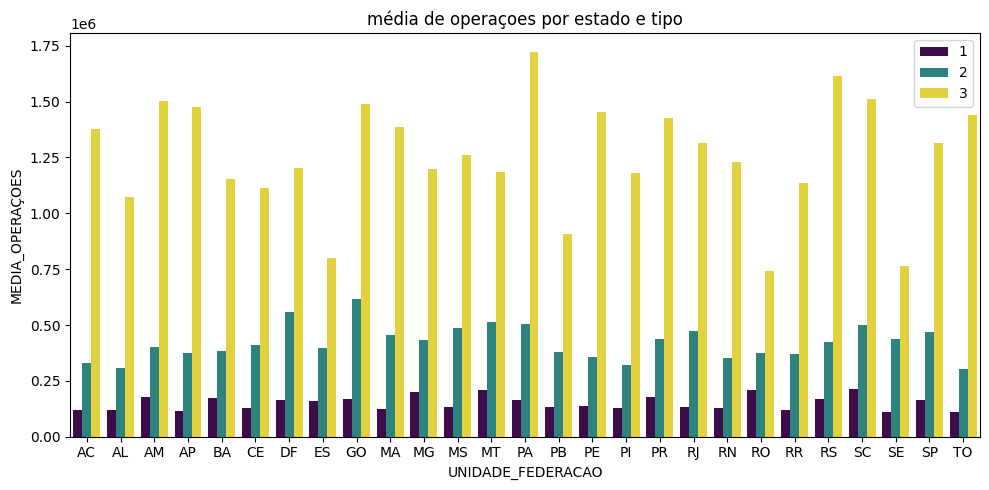

In [32]:
mean_operations = df2.groupby(['UNIDADE_FEDERACAO', 'TIPO_DESENROLA'])['MEDIA_OPERAÇOES'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.title('média de operaçoes por estado e tipo')
sns.barplot(data=mean_operations, x='UNIDADE_FEDERACAO', y='MEDIA_OPERAÇOES', hue='TIPO_DESENROLA', palette='viridis')
plt.tight_layout()
plt.legend()
plt.show()


Nesse grafico, vemos predominancia do tipo 3 do desenrola em todos os estados. 

Relaçao volume de operaçoes por estado e tipo de transaçao 

In [33]:
df2

,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES,MEDIA_OPERAÇOES
DATA_BASE,,,,,,,
2023-09-01,2,AC,49906,BB,142,1421991.10,10014.021831
2023-09-01,2,AC,10045,BRADESCO,17,94097.52,5535.148235
2023-09-01,2,AC,49944,BTG PACTUAL,7,37788.79,5398.398571
2023-09-01,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247430.66,3017.447073
2023-09-01,2,AC,51884,INTER,4,12306.86,3076.715000
...,...,...,...,...,...,...,...
2025-02-01,3,RJ,80185,SANTANDER - PRUDENCIAL,12,403555.07,33629.589167
2025-02-01,3,RN,81593,BCO DO NORDESTE DO BRASIL S.A. - PRUDENCIAL,2,17259.94,8629.970000
2025-02-01,3,RS,80185,SANTANDER - PRUDENCIAL,7,168618.00,24088.285714


Qual é o volume de operaçoes e seus tipos por estado?

<Axes: xlabel='UNIDADE_FEDERACAO', ylabel='VOLUME_OPERACOES'>

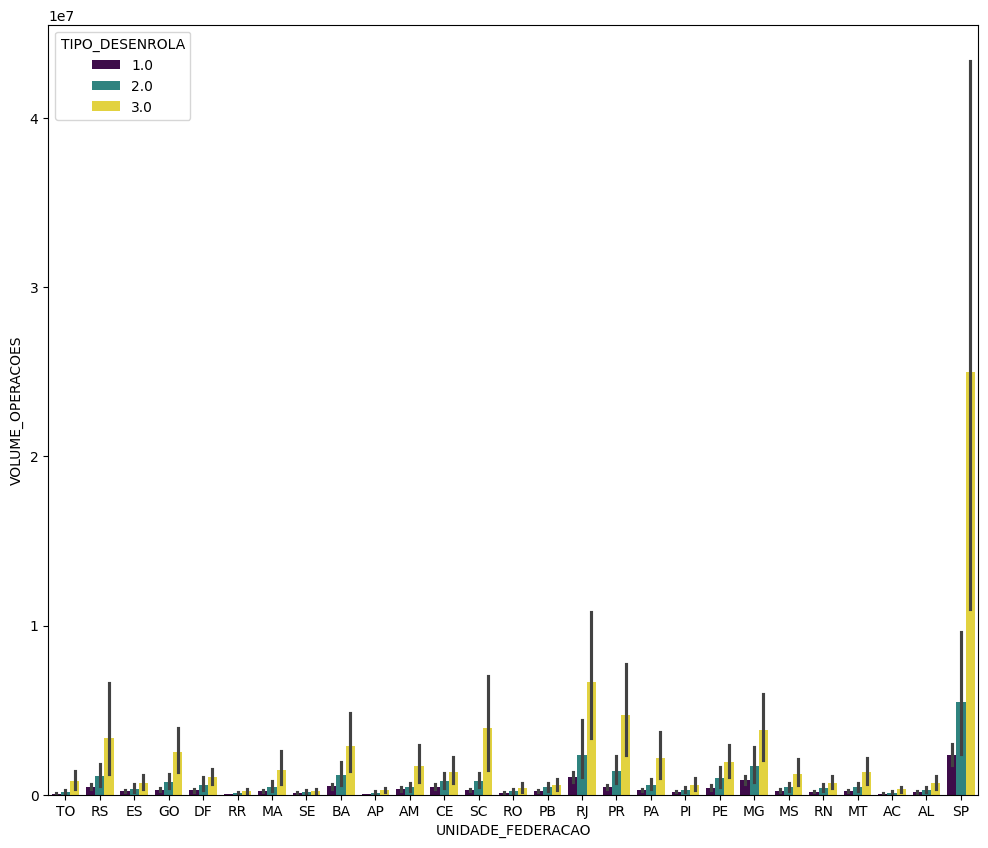

In [34]:
type_volumn_state = df2.groupby(['UNIDADE_FEDERACAO', 'VOLUME_OPERACOES'])['TIPO_DESENROLA'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,10))
sns.barplot(data=type_volumn_state, y='VOLUME_OPERACOES', x='UNIDADE_FEDERACAO', hue='TIPO_DESENROLA', palette='viridis' )

São Paulo, sem nenhuma novidade, apresenta maior volume de operaçoes entre os demais estados. Destacando-se pelo tipo 3 de operaçao. 

**mapa de calor, correlação**

In [ ]:
#criando nova separaçao de colunas por tipo(agora apenas as numéricas)
new_num_col = df2.select_dtypes(exclude='object')

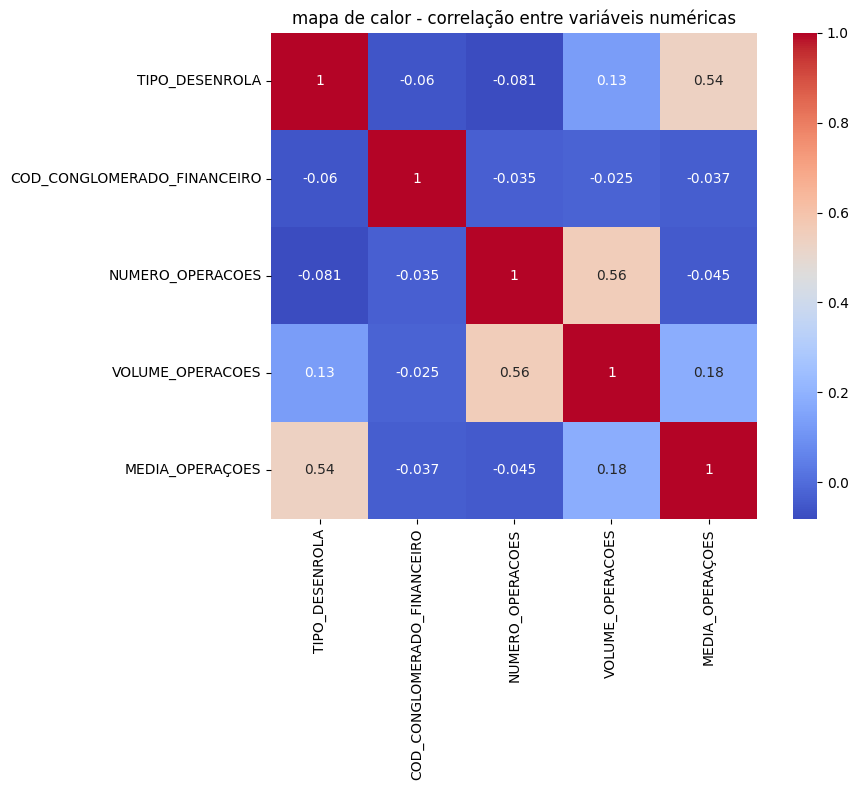

In [ ]:
#plotando heatmap
plt.figure(figsize=(10,8))
plt.title('mapa de calor - correlação entre variáveis numéricas')
sns.heatmap(new_num_col.corr(), annot=True, cmap='coolwarm', square=True, linecolor='white')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Temos as seguintes correlaçoes:

- número de operaçoes e volume de operações (já era esperado)

- média de operações e tipo de operações

***Análise Temporal***

**Nessa parte do projeto, buscarei estudar a comportamento temporal da nossa variavel alvo, no caso, "VOLUME_OPERACOES"**

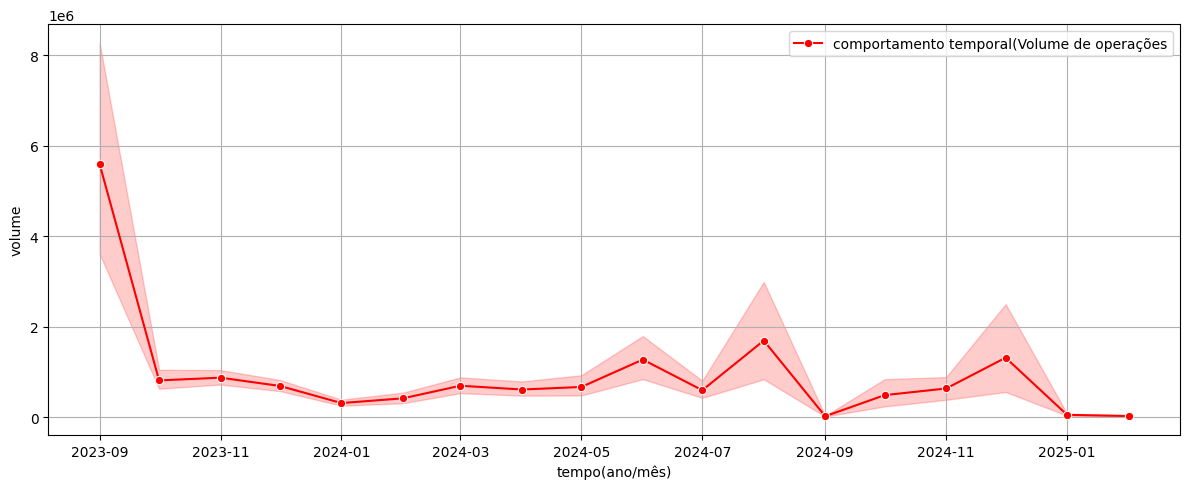

In [35]:
#plotando série temporal do nosso alvo 
plt.figure(figsize=(12,5))
sns.lineplot(df2['VOLUME_OPERACOES'], label='comportamento temporal(Volume de operações', marker='o', color='red')
plt.xlabel('tempo(ano/mês)')
plt.ylabel('volume')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

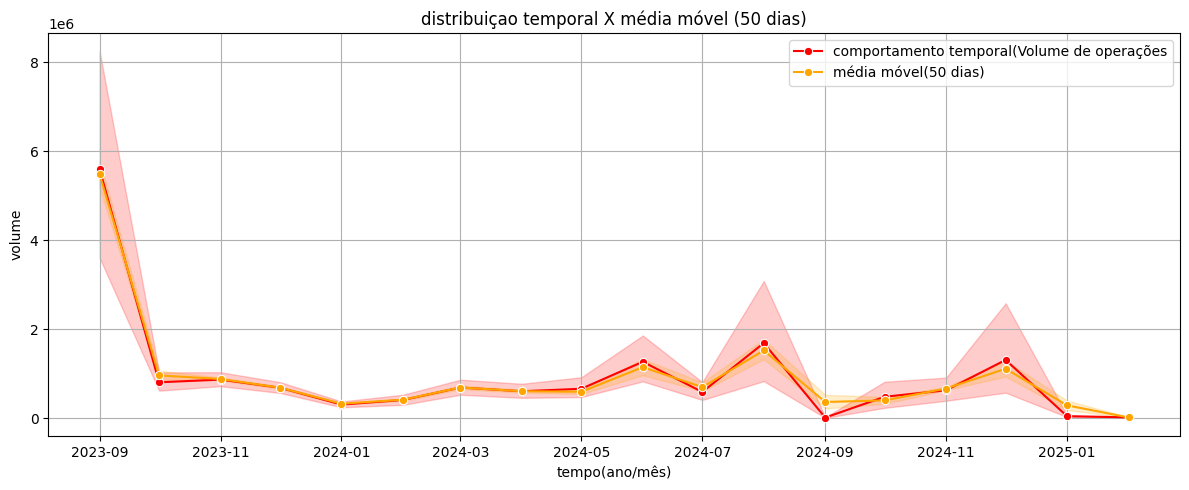

In [74]:
#funçao de média movel 
def moving(serie, window):
    mov_avg = df2[serie].rolling(window, center=True).mean()
    
    return mov_avg

#setando média móvel em uma janela de 50 dias
moving_50 = moving(serie='VOLUME_OPERACOES', window=50)

#plotando média móvel 
plt.figure(figsize=(12,5))
plt.title('distribuiçao temporal X média móvel (50 dias)')
sns.lineplot(df2['VOLUME_OPERACOES'], label='comportamento temporal(Volume de operações', marker='o', color='red')
sns.lineplot(moving_50, label='média móvel(50 dias)', color='orange', marker='o')
plt.xlabel('tempo(ano/mês)')
plt.ylabel('volume')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

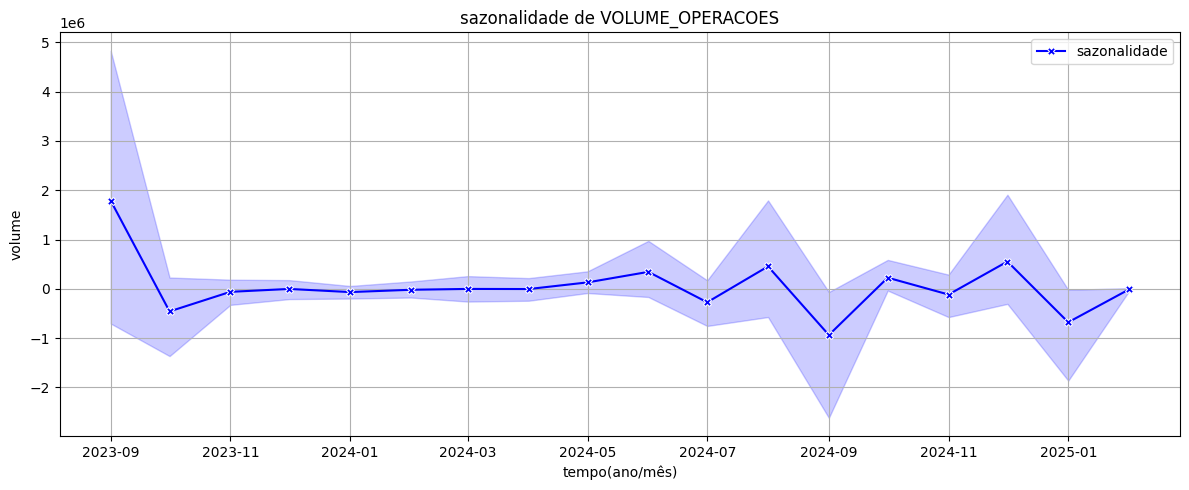

In [73]:
#funçao sazonalidade 
def sazo(serie):
    seasonality = df2[serie].diff(len(serie))
    
    return seasonality
sazo_ = sazo('VOLUME_OPERACOES')

#plotando sazonalidade
plt.figure(figsize=(12,5))
plt.title('sazonalidade de VOLUME_OPERACOES')
sns.lineplot(sazo_, color='blue', label='sazonalidade', marker='X')
plt.xlabel('tempo(ano/mês)')
plt.ylabel('volume')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

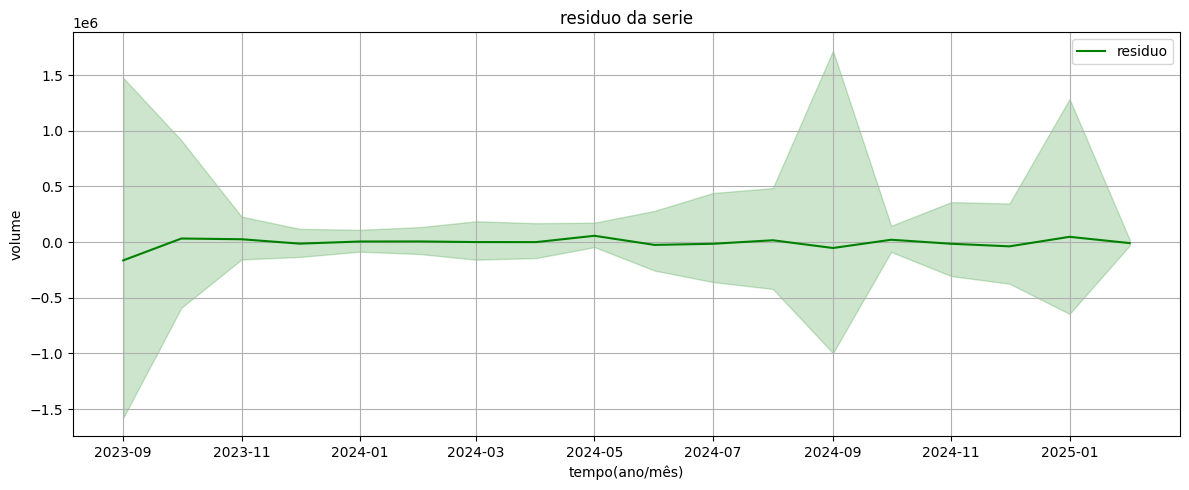

In [62]:
serie = df2['VOLUME_OPERACOES']
residual = serie - moving_50 - sazo_
plt.figure(figsize=(12,5))
plt.title('residuo da serie')
sns.lineplot(residual, color='green', label='residuo')
plt.xlabel('tempo(ano/mês)')
plt.ylabel('volume')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

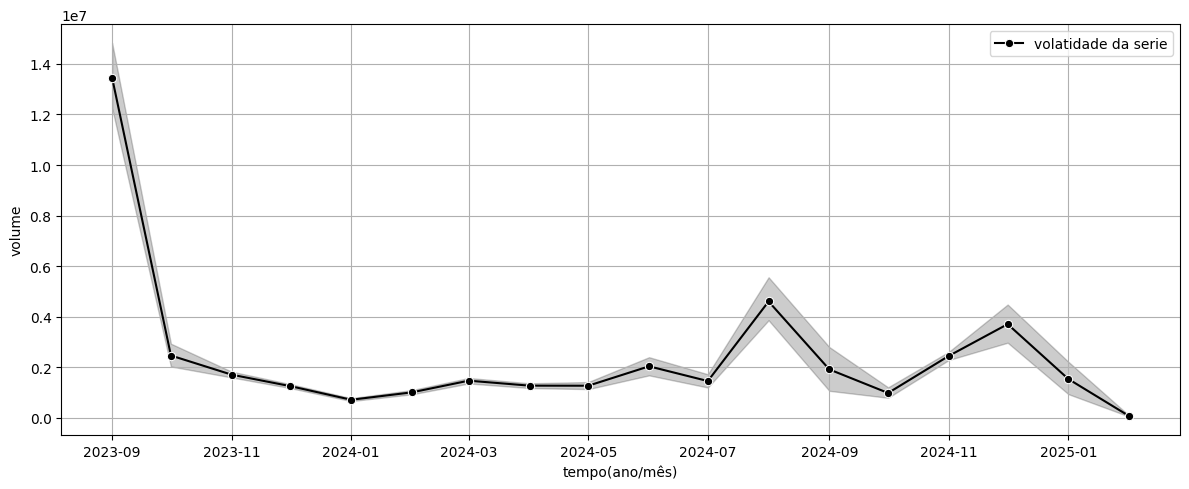

In [71]:
#funcao para verificar volatidade da serie(o quanto ela varia em relaçao ao tempo)
def std(serie, window):
    std_ = df2[serie].rolling(window, center=True).std()
    
    return std_

#plotando volatidade em um periodo de 50 dias 
standard = std(serie='VOLUME_OPERACOES', window=50)
plt.figure(figsize=(12,5))
sns.lineplot(standard, color='black', marker='o', label=f'volatidade da serie')
plt.xlabel('tempo(ano/mês)')
plt.ylabel('volume')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

**Gráficos de autocorrelação**

Explicando autocorrelaçao de forma mais básica possivel: 

Esse tipo de vizualizaçao nos mostra o comportamento de ontem em relaçao a hoje, ou seja, "qual é a correlaçao de ontem comparado a hoje?".

Por exemplo:

Se eu sou alto hoje, será que amanhã também serei alto?

- O eixo X explica os dias passados (autocorrelaçao até 30 dias)

- O Y explica o nível de autocorrelaçao (-1 a 1)




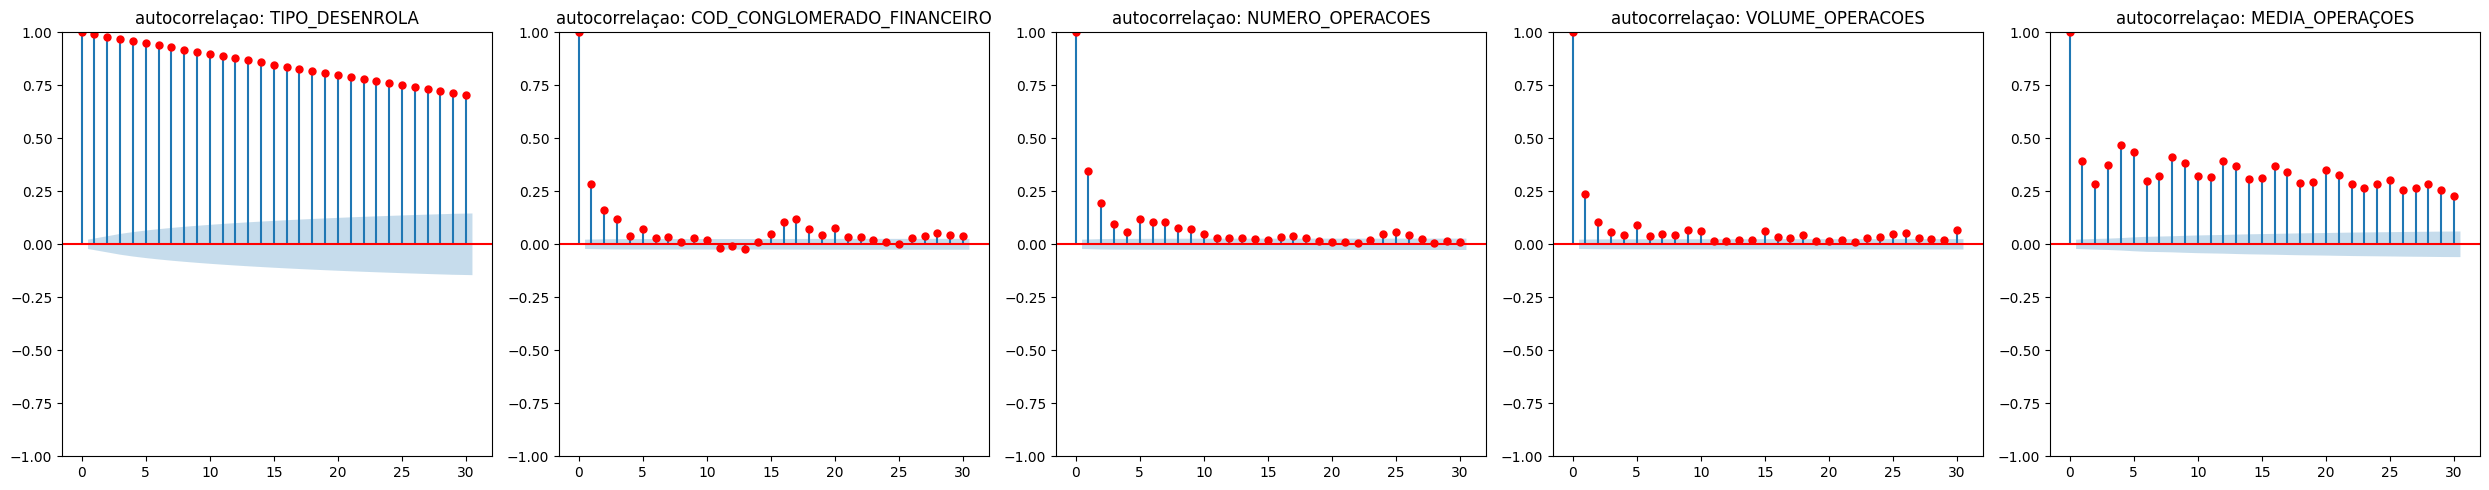

In [79]:
#plotando graficos de autocorrelação
n_cols = len(new_num_col.columns)  
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5))  
for i, auto in enumerate(new_num_col):
    ax = axes[i] if n_cols > 1 else axes
    plot_acf(new_num_col[auto].values.squeeze(), lags=30, alpha=0.05, ax=ax, color='red')
    ax.set_title(f'autocorrelaçao: {auto}')
plt.tight_layout()
plt.show()

Explicando resultados:

**TIPO_DESENROLA:**

- Os dias apresentam boa autocorrelaçao, variando pouco ou quase nada em relaçao ao tempo. Se depender apenas dessa variável, podemos trabalhar com modelos recorrentes. 

**COD_CONGLOMERADO_FINANCEIRO**

 - O passado apresenta autocorrelação, porém baixa. Com o tempo, essa autocorrelação some. 

 **NUMERO_OPERACOES**

 - Mesma lógica da última coluna, a autocorrelação some com o tempo. 

 **VOLUME_OPERACOES** 

 - Autocorrelação fraca, também some com o tempo. 

 **MEDIA_OPERACOES**

 - Boa autocorrelação, que se mantém constante durante um tempo. Mas nao apresenta um score muito significativo. 







Por conta da baixa autocorrelação entre as variaveis, não vejo necessidade de trabalhar com modelos de recorrencia como LSTMs e GRUs. 

**Modelagem**

In [82]:
#separando x e y 
x = df2.drop('VOLUME_OPERACOES', axis=1)
y = df2['VOLUME_OPERACOES']

In [83]:
#verificando shape
x.shape, y.shape

((7848, 6), (7848,))

In [91]:
#split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=0)


In [96]:
print(f'shape conjunto de treino x: {x_train.shape} e y: {y_train.shape}')
print(f'shape conjunto de teste x: {x_test.shape} e y: {y_test.shape}')

shape conjunto de treino x: (6278, 6) e y: (6278,)
shape conjunto de teste x: (1570, 6) e y: (1570,)
